<a href="https://colab.research.google.com/github/Amrita-GitHub/somya-28-02-2025/blob/main/matplotlib_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Load the data
customer_data = pd.read_csv('/content/drive/MyDrive/week9-files/customer-data.csv')
df = pd.DataFrame(customer_data)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Customer_ID,Age,Gender,Location,Segment,Purchase_Amount,Purchase_Frequency,Product_Category,Satisfaction_Score,Loyalty_Years,Payment_Method
0,C1001,24,Female,Urban,New,350,1,Smartphones,4.2,0.3,Credit Card
1,C1002,32,Male,Urban,Regular,675,3,Laptops,4.5,1.8,PayPal
2,C1003,45,Female,Suburban,Premium,1240,5,Laptops,4.8,3.2,Credit Card
3,C1004,29,Male,Urban,Regular,520,2,Gaming,4.4,1.1,Credit Card
4,C1005,51,Female,Rural,Premium,980,4,Smart Home,4.7,4.5,Credit Card
5,C1006,38,Male,Suburban,Regular,720,3,Tablets,4.0,2.3,Debit Card
6,C1007,22,Female,Urban,New,280,1,Accessories,3.9,0.5,PayPal
7,C1008,60,Male,Rural,Premium,1350,4,Laptops,4.6,5.7,Credit Card
8,C1009,41,Female,Suburban,Regular,590,2,Smartphones,4.2,2.4,Credit Card
9,C1010,27,Male,Urban,New,320,1,Wearables,4.1,0.7,PayPal


In [ ]:
# Create a grouped bar chart showing purchase frequency by customer segment and product category
# Use different colors for each segment
# Include a title, axis labels, and legend

<ipython-input-11-9f9b55e3e952>:8: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_pivot = df.pivot_table(index="Product_Category", columns="Segment", values="Purchase_Frequency",aggfunc=sum)


Segment           New  Premium  Regular
Product_Category                       
Accessories       5.0      0.0      0.0
Audio             5.0      0.0      0.0
Cameras           0.0     12.0      0.0
Gaming            0.0      8.0      8.0
Laptops           0.0     29.0      3.0
Networking        0.0      4.0      0.0
Smart Home        0.0     20.0      0.0
Smartphones       1.0      0.0     17.0
Tablets           0.0      0.0     16.0
Wearables         4.0      0.0      3.0


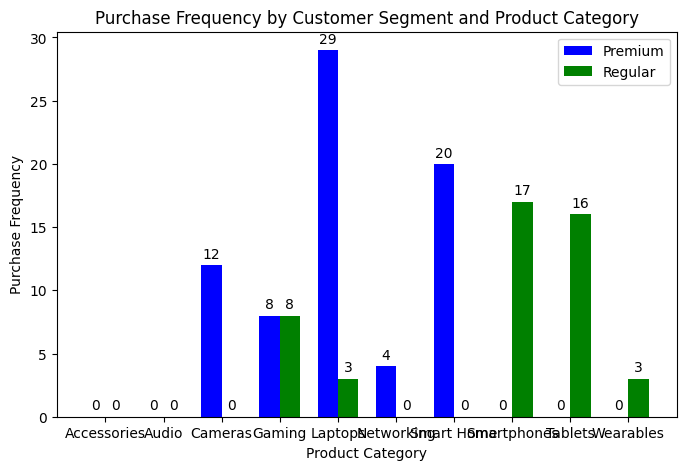

In [11]:
category = df['Product_Category']
segment = df['Segment']
purchase_frequency = df['Purchase_Frequency']


# Pivot data for grouped bar chart
# df_pivot = df.pivot(index="Product_Category", columns="Segment", values="Purchase_Frequency")
df_pivot = df.pivot_table(index="Product_Category", columns="Segment", values="Purchase_Frequency",aggfunc=sum)
df_pivot =df_pivot.fillna(0)
print(df_pivot)

# Plot settings
categories = df_pivot.index
x = np.arange(len(categories))  # X locations for groups
width = 0.35  # Width of bars

fig, ax = plt.subplots(figsize=(8, 5))

# Plot bars
bars1 = ax.bar(x - width/2, df_pivot["Premium"], width, label="Premium", color="blue")
bars2 = ax.bar(x + width/2, df_pivot["Regular"], width, label="Regular", color="green")

# Add data labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.0f}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', fontsize=10)


# Labels, title, and legend
ax.set_title("Purchase Frequency by Customer Segment and Product Category", fontsize=12)
ax.set_xlabel("Product Category", fontsize=10)
ax.set_ylabel("Purchase Frequency", fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Show plot
plt.show()